In [1]:
import pandas as pd
import json

In [ ]:
df = pd.read_json (r'/Users/yaohanxue/Desktop/Yelp_academic_dataset_round8/yelp_academic_dataset_business.json',lines=True)
df.to_csv (r'/Users/yaohanxue/Desktop/Yelp_academic_dataset_round8/yelp_academic_dataset_business.csv', index = None)

In [2]:
df = pd.read_csv("yelp_academic_dataset_business.csv")
df

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,5UmKMjUEUNdYWqANhGckJw,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",True,"['Fast Food', 'Restaurants']",Dravosburg,7,Mr Hoagie,[],-79.900706,PA,3.5,40.354327,"{'Take-out': True, 'Drive-Thru': False, 'Good ...",business
1,UsFtqoBl7naz8AVUBZMjQQ,"202 McClure St\nDravosburg, PA 15034",{},True,['Nightlife'],Dravosburg,5,Clancy's Pub,[],-79.886814,PA,3.0,40.350553,"{'Happy Hour': True, 'Accepts Credit Cards': T...",business
2,cE27W9VPgO88Qxe4ol6y_g,"1530 Hamilton Rd\nBethel Park, PA 15234",{},False,"['Active Life', 'Mini Golf', 'Golf']",Bethel Park,5,Cool Springs Golf Center,[],-80.014660,PA,2.5,40.354115,{'Good for Kids': True},business
3,mVHrayjG3uZ_RLHkLj-AMg,"414 Hawkins Ave\nBraddock, PA 15104","{'Tuesday': {'close': '19:00', 'open': '10:00'...",True,"['Bars', 'American (New)', 'Nightlife', 'Loung...",Braddock,26,Emil's Lounge,[],-79.866211,PA,4.5,40.408830,"{'Alcohol': 'full_bar', 'Noise Level': 'averag...",business
4,mYSpR_SLPgUVymYOvTQd_Q,"1000 Clubhouse Dr\nBraddock, PA 15104","{'Sunday': {'close': '15:00', 'open': '10:00'}...",True,"['Active Life', 'Golf']",Braddock,3,Grand View Golf Club,[],-79.855782,PA,5.0,40.403405,"{'Parking': {'garage': False, 'street': False,...",business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85896,m7-3lyY0CJEhePfJKWtD3w,"3899 East Sunset Rd\nSte 105\nLas Vegas, NV 89120","{'Tuesday': {'close': '18:00', 'open': '10:00'...",True,"['Bridal', 'Fashion', 'Shopping', 'Formal Wear']",Las Vegas,61,Bowties Bridal,[],-115.089318,NV,4.0,36.070535,{'Accepts Credit Cards': True},business
85897,g0vvhkZWZKlwF8BUeSPaTA,"525 N Estrella Pkwy\nSte 100\nGoodyear, AZ 85338",{},True,"['Mexican', 'Restaurants']",Goodyear,89,Senor Taco,[],-112.392009,AZ,3.5,33.452205,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
85898,46L_7y9QXffPpOaXNLX8hg,"9215 North 7th St\nPhoenix, AZ 85020","{'Monday': {'close': '18:00', 'open': '07:00'}...",True,"['Car Wash', 'Automotive']",Phoenix,7,Cobblestone Auto Spa,[],-112.064854,AZ,3.0,33.570417,{},business
85899,HuLzZUBkHEcHk6ETDJIVhQ,16 Waterloo Place\nOld Town\nEdinburgh EH1 3EG,{},True,"['Home Services', 'Real Estate', 'Apartments']",Edinburgh,5,Princess Street Suites,['Old Town'],-3.186813,EDH,4.0,55.953447,"{'Accepts Credit Cards': True, 'Wi-Fi': 'free'...",business


In [3]:
df.describe()

,review_count,longitude,stars,latitude
count,85901.000000,85901.000000,85901.000000,85901.000000
mean,34.352359,-99.107318,3.694852,37.034786
std,108.677591,27.437773,0.946045,5.389208
min,3.000000,-115.386550,1.000000,32.865882
25%,5.000000,-115.062628,3.000000,33.506767
50%,10.000000,-111.943739,4.000000,35.314392
75%,26.000000,-80.951101,4.500000,36.203094
max,6200.000000,8.549249,5.000000,56.033777


#### remove features

In [4]:
df.drop(columns=['business_id','full_address','hours','categories','city','name','state','neighborhoods','attributes','type'], inplace=True)
df

,open,review_count,longitude,stars,latitude
0,True,7,-79.900706,3.5,40.354327
1,True,5,-79.886814,3.0,40.350553
2,False,5,-80.014660,2.5,40.354115
3,True,26,-79.866211,4.5,40.408830
4,True,3,-79.855782,5.0,40.403405
...,...,...,...,...,...
85896,True,61,-115.089318,4.0,36.070535
85897,True,89,-112.392009,3.5,33.452205
85898,True,7,-112.064854,3.0,33.570417
85899,True,5,-3.186813,4.0,55.953447


#### Impute missing values

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mean = df[col].mean() #impute with the mean
        df[col] = df[col].fillna(mean)

#### dropping duplicates by considering all columns

In [6]:
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)

df.to_csv(r'/Users/yaohanxue/Desktop/data science cw/mydataset.csv', index = False)

## logistic regression

In [17]:
# standardized

import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X = df[df.columns[1:]]
y = df[df.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

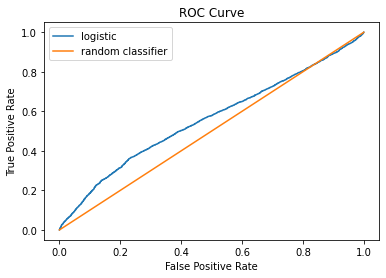

lr_auc:0.559
optimal_threshold:0.862
Score of Logistic Regression: 0.854


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from os import path
from sklearn.model_selection import cross_val_score

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


logisticRegr = LogisticRegression(max_iter=2000)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict_proba(X_test)[:, 1]

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, predictions.reshape(-1, 1))

plt.plot(lr_fpr, lr_tpr)
plt.plot(ns_fpr, ns_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(["logistic", "random classifier"])
plt.show()

lr_auc = roc_auc_score(y_test, predictions)
print("lr_auc:""%.3f" %lr_auc)

optimal_idx = np.argmax(lr_tpr - lr_fpr)
optimal_threshold = thresholds[optimal_idx]
print("optimal_threshold:""%.3f" %optimal_threshold)

score = logisticRegr.score(X_test, y_test)
print("Score of Logistic Regression: ""%.3f" %score)

In [65]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

lrc=LogisticRegression()
lrc.fit(X_train,y_train)
lrc_p=lrc.predict(X_test)

print(classification_report(y_test, lrc_p))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      3735
        True       0.85      1.00      0.92     21762

    accuracy                           0.85     25497
   macro avg       0.43      0.50      0.46     25497
weighted avg       0.73      0.85      0.79     25497



/Users/yaohanxue/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaohanxue/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaohanxue/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

In [69]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)



print(cf_matrix)

print("\nTN =",cf_matrix[0][0])
print("FN =",cf_matrix[0][1])
print("FP =",cf_matrix[1][0])
print("TP =",cf_matrix[1][1])

[[    0  3735]
 [    0 21762]]

TN = 0
FN = 3735
FP = 0
TP = 21762


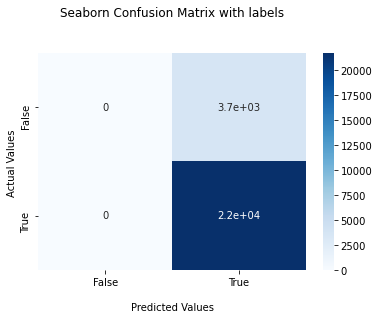

In [70]:
# plot confusion matrix
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [77]:
from sklearn import metrics

print("Accuracy: %.3f" %metrics.accuracy_score(y_test, y_pred))
print("Precision: %.3f" %metrics.precision_score(y_test, y_pred))
print("Recall: %.3f" %metrics.recall_score(y_test, y_pred))
print("F1 Score: %.3f" %f1_score(y_test, y_pred))

Accuracy: 0.854
Precision: 0.854
Recall: 1.000
F1 Score: 0.921
